In [3]:
#how to import required libarary
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [4]:
# #how to load the data set
# test = pd.read_csv("/content/drive/MyDrive/Test-1542969243754.csv")
# test_benef = pd.read_csv("/content/drive/MyDrive/Test_Beneficiarydata-1542969243754.csv")
# #test_inpat = ("/content/drive/MyDrive/Test_Inpatientdata-1542969243754.csv", delimiter =',', nrows = nRowsRead)
# nRowsRead = None # specify 'None' if want to read whole file
# test_inpat = pd.read_csv('/content/drive/MyDrive/Test_Inpatientdata-1542969243754.csv', delimiter=',', nrows = nRowsRead)
train = pd.read_csv("/content/drive/MyDrive/Train-1542865627584.csv")
train_benef = pd.read_csv("/content/drive/MyDrive/Train_Beneficiarydata-1542865627584.csv")
train_inpat = pd.read_csv("/content/drive/MyDrive/Train_Inpatientdata-1542865627584.csv")
train_outpat = pd.read_csv("/content/drive/MyDrive/Train_Outpatientdata-1542865627584.csv")

In [3]:
# nRowsRead = None
# #test_oupat = ("/content/drive/MyDrive/Test_Outpatientdata-1542969243754.csv")
# test_outpat = pd.read_csv('/content/drive/MyDrive/Test_Outpatientdata-1542969243754.csv', delimiter=',', nrows = nRowsRead)

In [4]:
# print("shape of the test_oupat data set: ", test_outpat.shape)

shape of the test_oupat data set:  (125841, 27)


In [5]:
#how to check shape f the data set
# print("shape of the test data set: ", test.shape)
# print("shape of the test_benef data set: ", test_benef.shape)
# print("shape of the test_inpat data set: ", test_inpat.shape)
print("shape of the train daa set: ", train.shape)
print("shape of the train_benef data set: ", train_benef.shape)
print("shape of the train_inpat data set: ", train_inpat.shape)
print("shape of the train_outpat data set: ", train_outpat.shape)

shape of the train daa set:  (5410, 2)
shape of the train_benef data set:  (138556, 25)
shape of the train_inpat data set:  (40474, 30)
shape of the train_outpat data set:  (517737, 27)


In [8]:
#how to check column
train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [7]:
#how to check header section 
train_benef.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [9]:
train_inpat.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [10]:
train_outpat.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [12]:
#how to check column
train.columns

Index(['Provider', 'PotentialFraud'], dtype='object')

In [14]:
#how to count the 'potentialFraud'
train['PotentialFraud'].value_counts()

No     4904
Yes     506
Name: PotentialFraud, dtype: int64

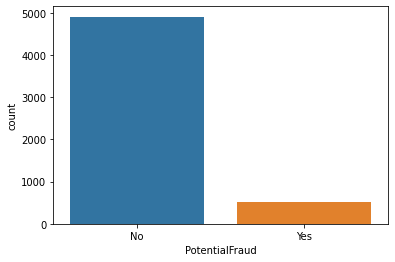

In [15]:
#how to visulize the 'potentialFraud column
sns.countplot(x='PotentialFraud', data=train)

In [17]:
#how to check column in train_benef
train_benef.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [18]:
#how to check column in train_inpat
train_inpat.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [19]:
#how to check train_outpat columns
train_outpat.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [21]:
#how to check nan values in train data set
train.isnull().sum()

Provider          0
PotentialFraud    0
dtype: int64

In [22]:
#how to check nan column in train-benef
train_benef.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [23]:
#hw to check train_inpat nan values
train_inpat.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [24]:
#how to check nan values in train_outpat column
train_outpat.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

Inpatient - Procedure codes

In [39]:
#train_inpat = train_inpat.reset_index()

In [35]:
#create a dataframe for concatinating all Procedure Code columns  

train_inpat_df = pd.DataFrame(columns = ['ProcedureCode'])
train_inpat_df['ProcedureCode'] = pd.concat([train_inpat["ClmProcedureCode_1"],
                                             train_inpat["ClmProcedureCode_2"],
                                             train_inpat["ClmProcedureCode_3"],
                                             train_inpat["ClmProcedureCode_4"],
                                             train_inpat["ClmProcedureCode_5"], 
                                             train_inpat["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

print(train_inpat_df.shape)

(29692, 1)


In [36]:
def analyse_cat_columns(dataset,col_to_analyse='' , 
                        prefix = '',title = 'Distribution in percentage ',
                        top_val = 30, 
                        y_lim = np.arange(0,8),
                        color ='blue'):
    """This functiom plot bar graog for categorical column"""
    #get top 30 procedure codes with its count
    val_counts_ = dataset[col_to_analyse].value_counts()
    #store this information in dataframe 
    val_counts_df = val_counts_.to_frame() #store this information in dataframe
    val_counts_df.columns = ['count'] 
    val_counts_df[col_to_analyse] = val_counts_df.index
    #since simply plotting bar plots for count of each val would not give much information,so it better to plot in percentage.
    val_counts_df[col_to_analyse] = prefix + val_counts_df[col_to_analyse].astype(str)
    val_counts_df['Percentage'] = (val_counts_df['count']/sum(val_counts_df['count']))*100
    val_counts_df = val_counts_df.head(top_val)    
    val_counts_df.plot(x =col_to_analyse, y='Percentage', kind='bar', color = color, \
                        title=title, figsize=(15,5),yticks = y_lim ,grid = True )

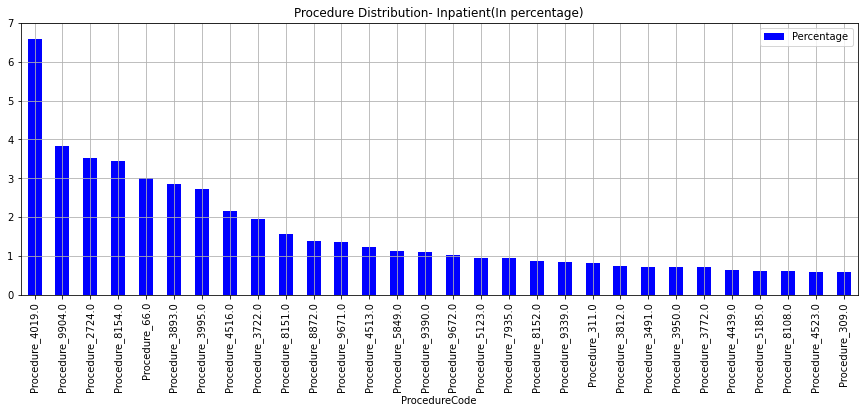

In [38]:
analyse_cat_columns(train_inpat_df, col_to_analyse='ProcedureCode' , prefix = 'Procedure_',title = 'Procedure Distribution- Inpatient(In percentage)',top_val=30)

# Inpatient - Procedure code
Procedure code 4019 is the most common procedure that is followed.

Around 6.6% patients have undergone procedure code 4019.

Procedure code 4019, 9904, 2724,8154 and 66 are top 5 procedure code for inpatient data.

Inpatient - Diagnosis codes

In [40]:
#create a dataframe for concatinating all DiagnosisCode Code columns  
train_inpat_df = pd.DataFrame(columns = ['DiagnosisCode'])
train_inpat_df['DiagnosisCode'] = pd.concat([train_inpat["ClmDiagnosisCode_1"],
                                             train_inpat["ClmDiagnosisCode_2"], 
                                             train_inpat["ClmDiagnosisCode_3"], 
                                             train_inpat["ClmDiagnosisCode_4"],
                                             train_inpat["ClmDiagnosisCode_5"], 
                                             train_inpat["ClmDiagnosisCode_6"],
                                             train_inpat["ClmDiagnosisCode_7"],
                                             train_inpat["ClmDiagnosisCode_8"],
                                             train_inpat["ClmDiagnosisCode_9"],
                                             train_inpat["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

print(train_inpat_df.shape)

(327328, 1)


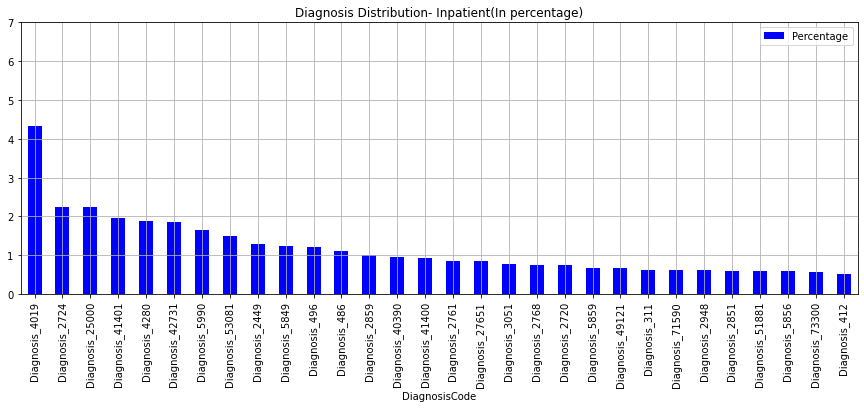

In [41]:
analyse_cat_columns(train_inpat_df,col_to_analyse='DiagnosisCode',
                    prefix = 'Diagnosis_',
                    title = 'Diagnosis Distribution- Inpatient(In percentage)',
                    top_val = 30, color ='blue')

# Inpatient - Diagnosis code
Diagnosis code 4019 is the most common Diagnosis a patinet undergo.

Around 4.5% patients have undergone Diagnosis code 4019.

Diagnosis code 4019, 2724, 25000, 41401 and 4280 are top 5 Diagnosis code for inpatient data.

#Outpatient - Procedure codes

In [42]:
#create a dataframe for concatinating all Procedure Code columns  
train_outpat_df = pd.DataFrame(columns = ['ProcedureCode'])
train_outpat_df['ProcedureCode'] = pd.concat([train_outpat["ClmProcedureCode_1"], 
                                              train_outpat["ClmProcedureCode_2"],
                                              train_outpat["ClmProcedureCode_3"],
                                              train_outpat["ClmProcedureCode_4"], 
                                              train_outpat["ClmProcedureCode_5"], 
                                              train_outpat["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

print(train_outpat_df.shape)

(204, 1)


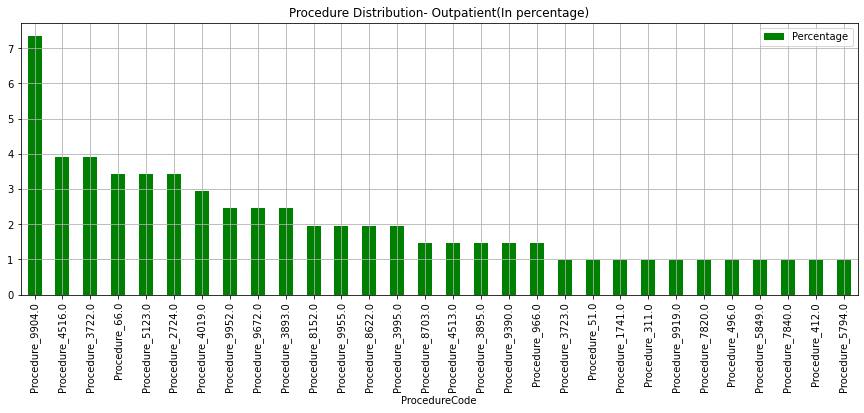

In [45]:
analyse_cat_columns(train_outpat_df,col_to_analyse='ProcedureCode',
                    prefix = 'Procedure_',title = 'Procedure Distribution- Outpatient(In percentage)',
                    top_val = 30,color ='green')

Outpatient - Procedure code

Procedure code 9904 is the most common procedure that is followed.

Around 7.5% patients have undergone procedure code 9904.

Procedure code 9904,3722,4516,2724 and 66 are top 5 procedure code for inpatient data.

Outpatient - Diagnosis codes

In [46]:
#create a dataframe for concatinating all DiagnosisCode Code columns  
train_outpat_df = pd.DataFrame(columns = ['DiagnosisCode'])
train_outpat_df['DiagnosisCode'] = pd.concat([train_outpat["ClmDiagnosisCode_1"],
                                              train_outpat["ClmDiagnosisCode_2"], 
                                              train_outpat["ClmDiagnosisCode_3"], 
                                              train_outpat["ClmDiagnosisCode_4"],
                                              train_outpat["ClmDiagnosisCode_5"], 
                                              train_outpat["ClmDiagnosisCode_6"],
                                              train_outpat["ClmDiagnosisCode_7"],
                                              train_outpat["ClmDiagnosisCode_8"],
                                              train_outpat["ClmDiagnosisCode_9"],
                                               train_outpat["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()
print(train_outpat_df.shape)

(1353388, 1)


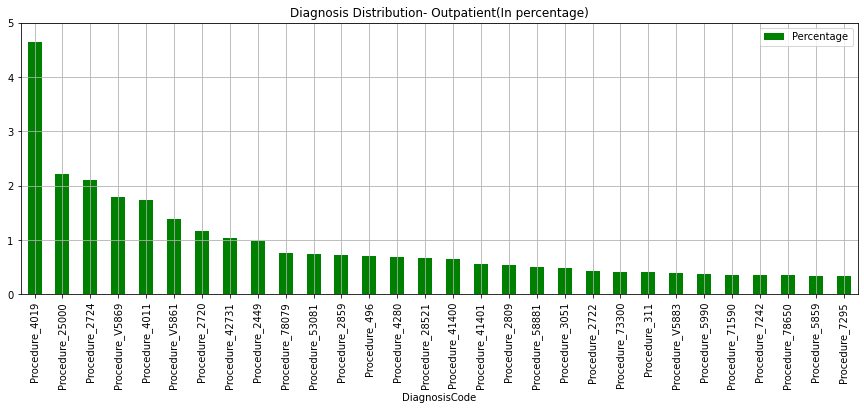

In [47]:
analyse_cat_columns(train_outpat_df,col_to_analyse='DiagnosisCode',
                    prefix = 'Procedure_',title = 'Diagnosis Distribution- Outpatient(In percentage)',
                    top_val = 30,color ='green',
                    y_lim = np.arange(0,6))

Outpatient - Diagnosis code

Diagnosis code 4019 is the most common Diagnosis a patinet undergo.

Around 4.8% patients have undergone Diagnosis code 4019.

Diagnosis code 4019, 25000, 2724, V5869 and 4011 are top 5 Diagnosis code for inpatient data.

#Dates

In [48]:
def get_year(date):
    """This function returns year from date"""
    date = str(date)
    return(int(date[:4]))

def get_month(date):
    """This function returns month from date"""
    date = str(date)
    return (int(date[5:7]))
def analyse_date_columns(data_frame, start_date_col, end_date_col , palette='coolwarm'):
    
    date_df = pd.DataFrame(columns = ['start_month','start_year','end_month','end_year' ])    
    date_df['start_month'] = data_frame[start_date_col].apply(get_month)
    date_df['start_year'] = data_frame[start_date_col].apply(get_year)
    date_df['end_month'] = data_frame[end_date_col].apply(get_month)
    date_df['end_year'] = data_frame[end_date_col].apply(get_year)
    plt.figure(figsize=(15, 5))    
    plt.subplot(121)
    data_frame[start_date_col].apply(get_year).value_counts().plot(kind='bar',title='start date')
    
    plt.subplot(122)
    data_frame[end_date_col].apply(get_year).value_counts().plot(kind='bar', title='end date')
    fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15,5)) 

    sns.countplot(x='start_month',data=date_df,hue='start_year',palette=palette , ax = axes[0])
    axes[0].set_title("Plot to Analyse behaviour of data point acc to month and year")

    sns.countplot(x='end_month',data=date_df,hue='end_year',palette=palette ,  ax = axes[1])
    axes[1].set_title("Plot to Analyse behaviour of data point acc to month and year ")  
    fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15,5)) 
    sns.stripplot(x='start_month',y="start_year", data=date_df, orient = 'h' , ax = axes[0])
    axes[0].set_title("Plot to Analyse behaviour of data point acc to month and year ")

    sns.stripplot(x='end_month',y="end_year", data=date_df, orient = 'h' , ax = axes[1])
    axes[1].set_title("Plot to Analyse behaviour of data point acc to month and year ")

    plt.tight_layout()

Inpatient - Claim start and end date

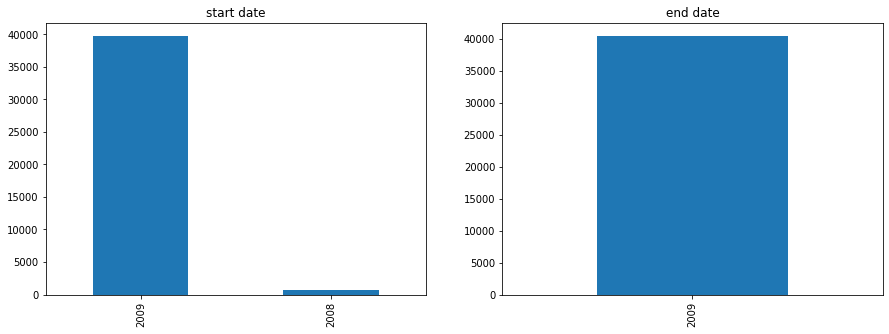

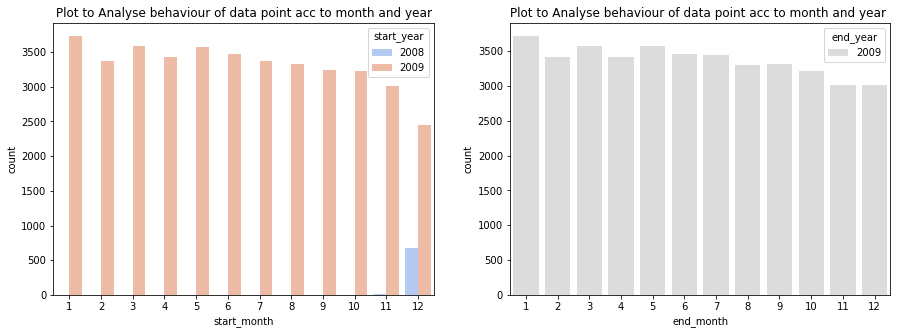

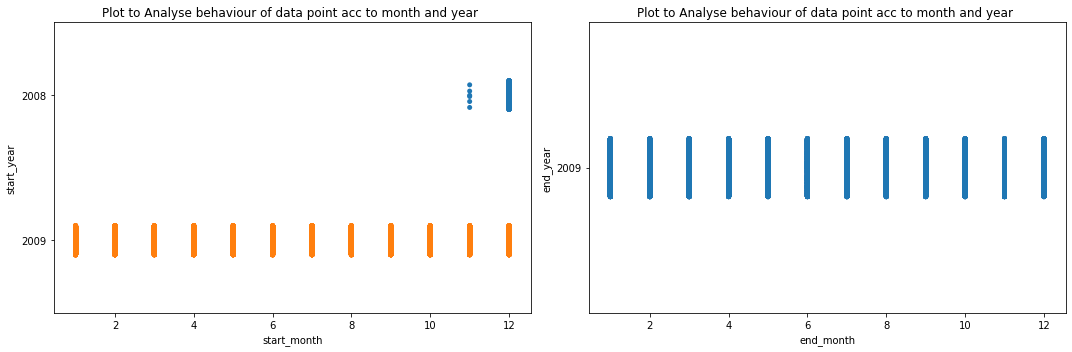

In [49]:
analyse_date_columns(train_inpat, 'ClaimStartDt', 'ClaimEndDt')

Inpatient - Claim start and end date

Inpatient datset contains records for the claims that was submitted in the year 2009 (mostly) and 2008.

All most all the claims were submitted in the year 2009. Very few were submitted in 2008.

In 2008 all the claims were submitted in the month of November(very few) and December(mostly) only.

In 2019 claims are submitted throughout the year, we observe slightly highest number of claims submission in the January 2009

All the claims are settled in 2009 and throughout the year. we observe tlightly highest number of claims settelement in January 2009

Inpatient - Patient admit and discharge date

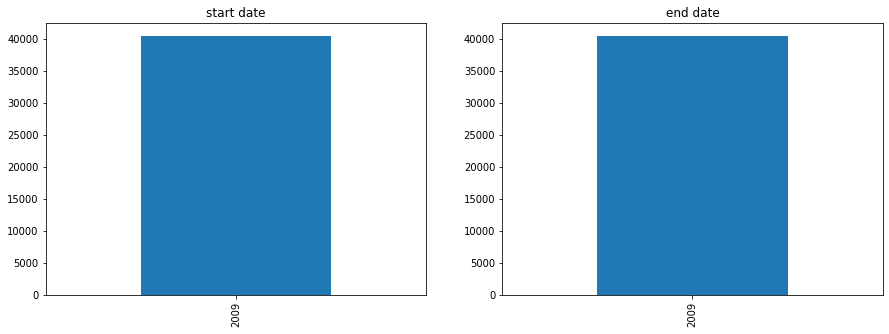

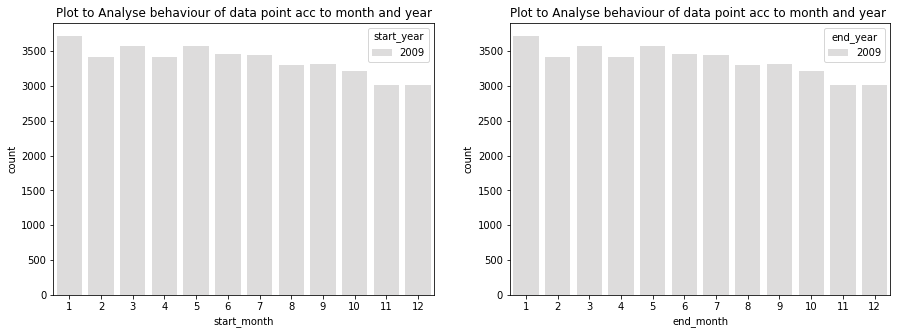

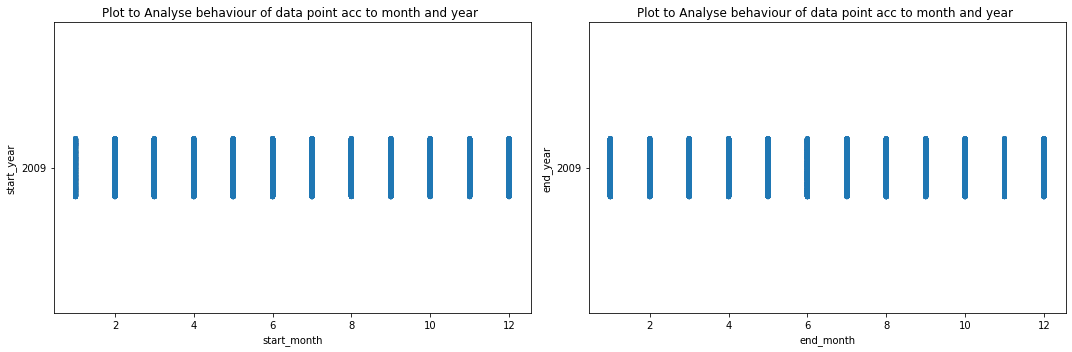

In [50]:
analyse_date_columns(train_inpat,'DischargeDt', 'DischargeDt')

Inpatient - Patient admit and discharge date

Inpatient datset contains records for the patients who were admitted and got discharged in the year 2008 and 2009.

Patients are getting admited and discharged throughout the month. No major differnece or change in pattern in number of patients getting admitted or discharged in any particular month.

Physicians

1.   Inpatient - Attending Physician



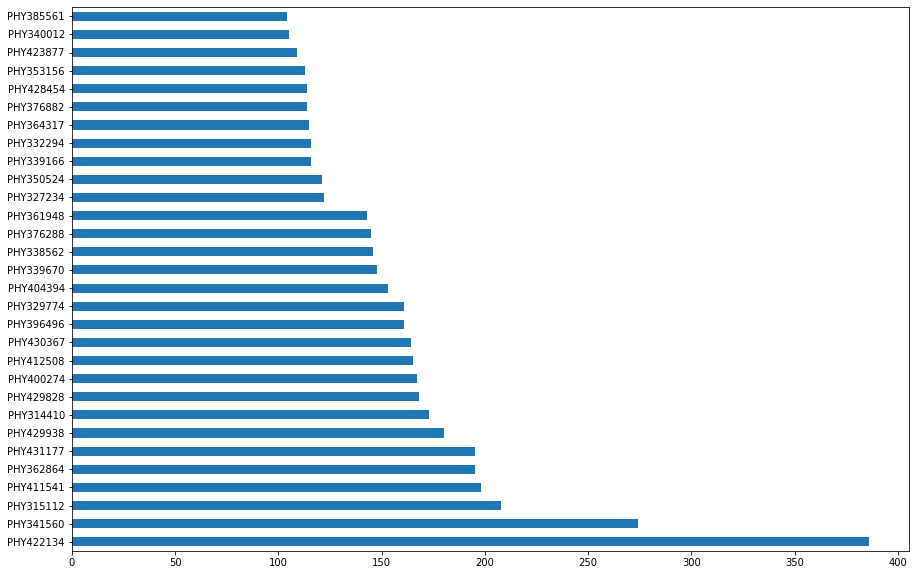

In [52]:
plt.figure(figsize=(15, 10))
train_inpat.AttendingPhysician.value_counts().head(30).plot(x=train_inpat.AttendingPhysician , kind = 'barh')

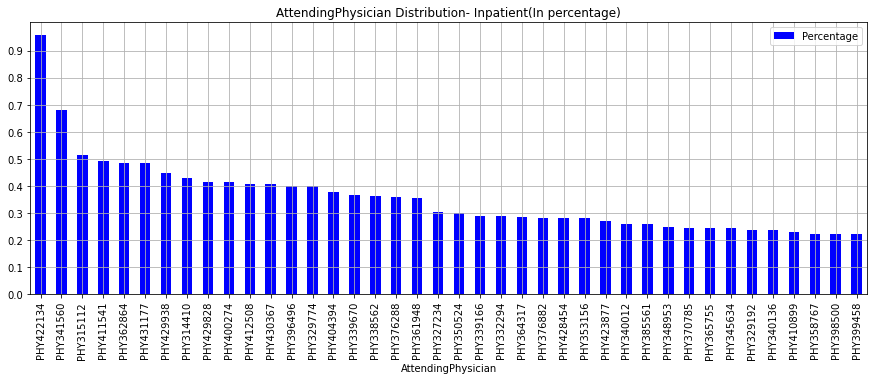

In [53]:
analyse_cat_columns(train_inpat,
                    col_to_analyse='AttendingPhysician' , 
                    prefix = '',y_lim = np.arange(0,1,0.1),
                    title = 'AttendingPhysician Distribution- Inpatient(In percentage)',top_val = 40)

Inpatient - Attending Physician

Most patinets are attended by pyhisican PHY422134.

Around 1% of the patients are attended by pyhisican PHY422134

Inpatient - Operating Physician

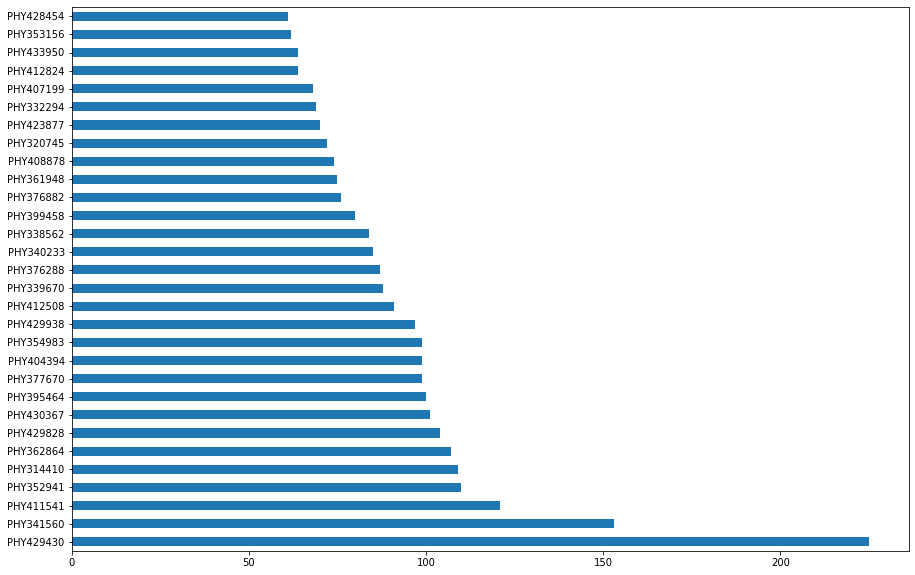

In [54]:
plt.figure(figsize=(15, 10))
train_inpat.OperatingPhysician.value_counts().head(30).plot(x=train_inpat.OperatingPhysician , kind = 'barh')

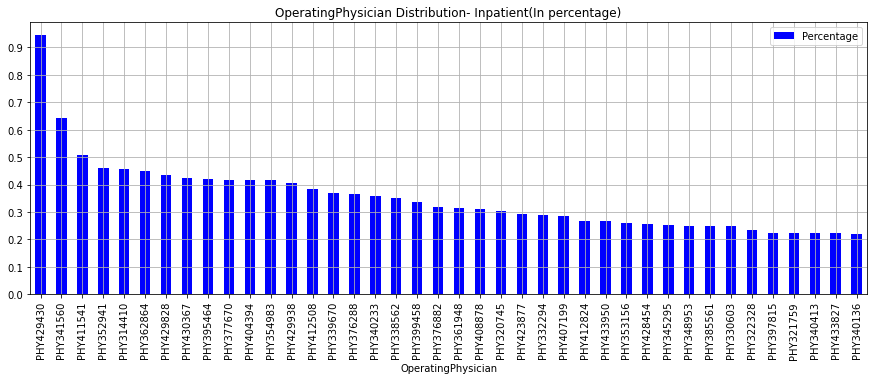

In [55]:
analyse_cat_columns(train_inpat,
                    col_to_analyse='OperatingPhysician' , 
                    prefix = '',y_lim = np.arange(0,1,0.1),
                    title = 'OperatingPhysician Distribution- Inpatient(In percentage)',top_val = 40)

Inpatient - Oprating Physician

Pyhisican PHY429430 perfoms the most of the operations.

Around 1% of the patients are attended by pyhisican PHY429430

Outpatient - Attending Physician

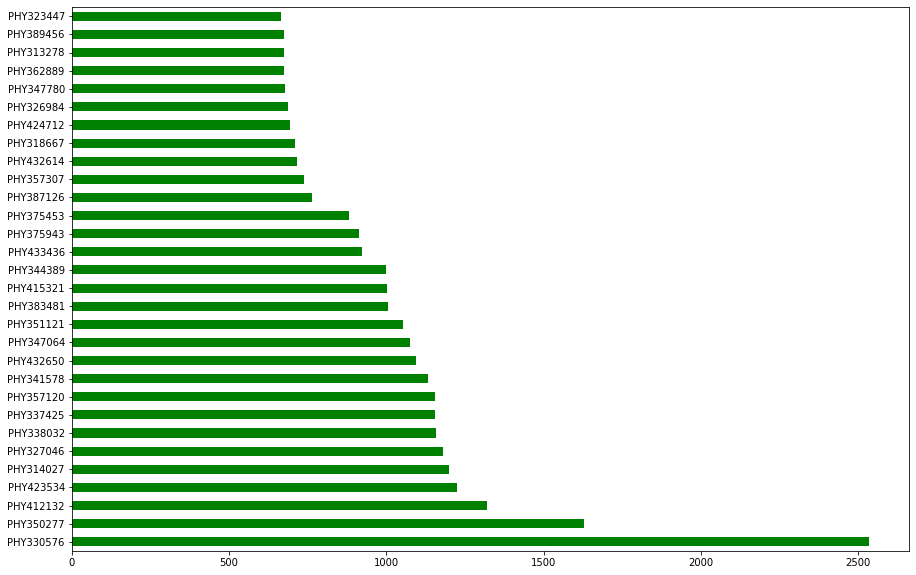

In [56]:
plt.figure(figsize=(15, 10))
train_outpat.AttendingPhysician.value_counts().head(30).plot( x=train_outpat.AttendingPhysician , kind = 'barh' , color = 'green')

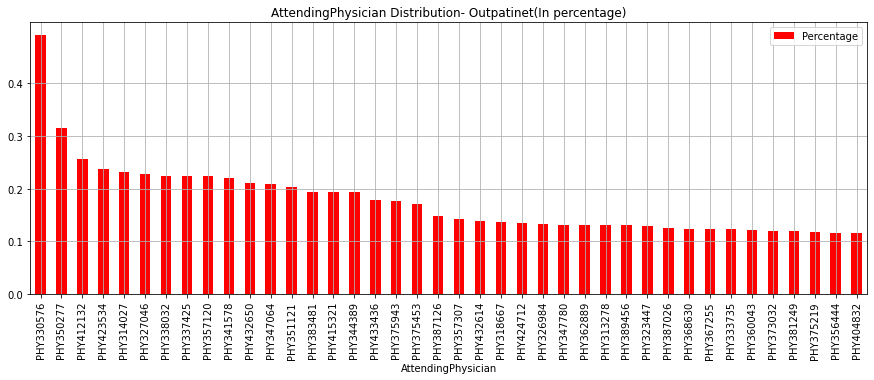

In [57]:
analyse_cat_columns(train_outpat,
                    col_to_analyse='AttendingPhysician' , 
                    prefix = '',y_lim = np.arange(0,0.5,0.1),
                    title = 'AttendingPhysician Distribution- Outpatinet(In percentage)',top_val = 40,
                    color='red')

Outpatient - Attending Physician

Most patinets are attended by pyhisican PHY330576.

Around 0.48% of the patients are attended by pyhisican PHY330576.

Outpatient - Operating Physician

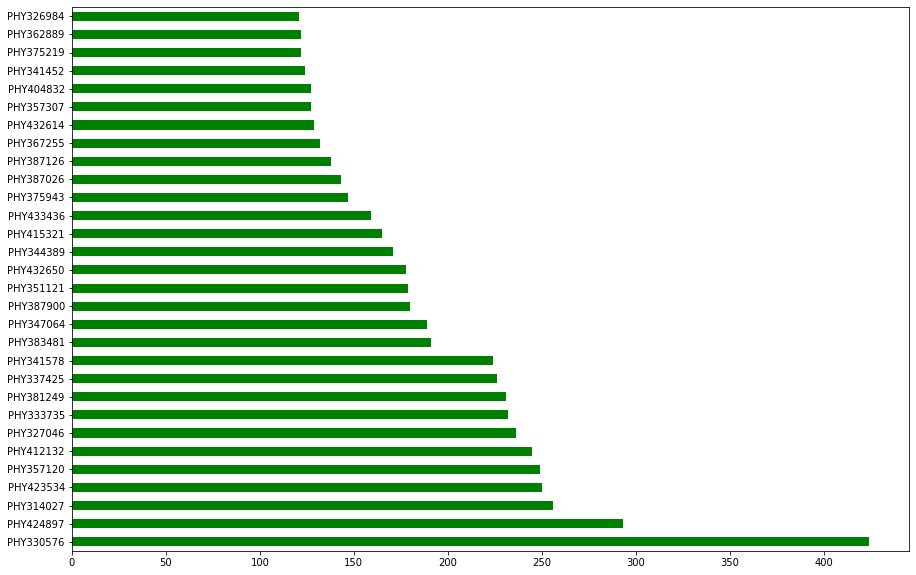

In [59]:
plt.figure(figsize=(15, 10))
train_outpat.OperatingPhysician.value_counts().head(30).plot( x=train_outpat.OperatingPhysician , kind = 'barh' , color = 'green')

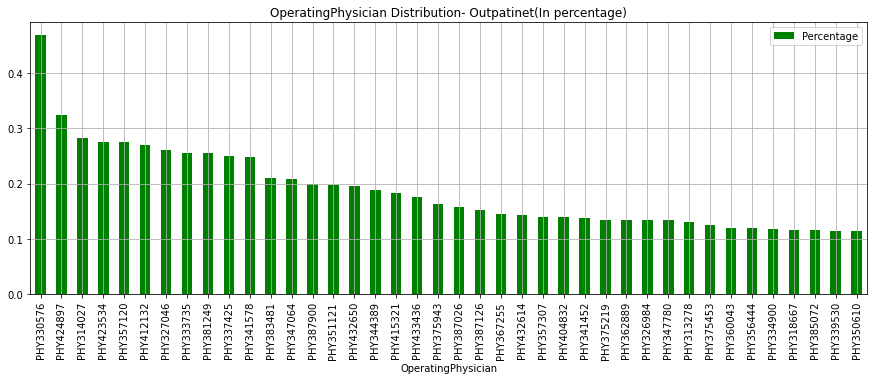

In [60]:
analyse_cat_columns(train_outpat,
                    col_to_analyse='OperatingPhysician' , 
                    prefix = '',y_lim = np.arange(0,0.5,0.1),
                    title = 'OperatingPhysician Distribution- Outpatinet(In percentage)',top_val = 40,
                    color='green')

Outpatient - Oprating Physician

Pyhisican PHY330576 perfoms the most of the operations.

Around 0.48% of the patients are attended by pyhisican PHY330576.

#ClaimAmtReimbursed

Inpatient

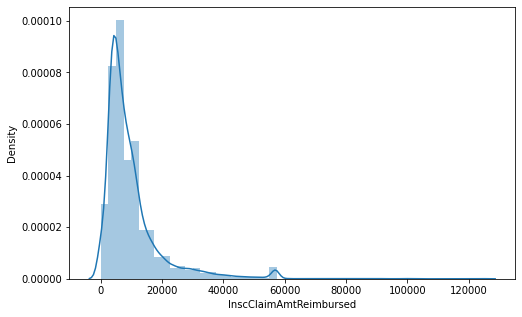

In [61]:
plt.figure(figsize=(8, 5))
sns.distplot(train_inpat.InscClaimAmtReimbursed)

Inpatient - ClaimAmt Reimbursed

Distibution of ammount that is paid as claim reimbursement seems like log normal distribtion

All most all Reimbursed ammount is between 0 and 20000
In very few cases amount more than 20000 is paid for claim reimbursement

#Outpatient

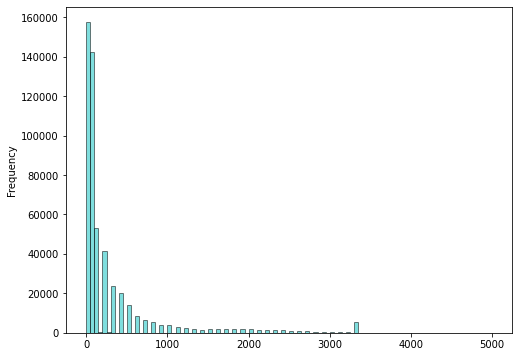

In [62]:
ax = train_outpat['InscClaimAmtReimbursed'].plot.hist(bins=100,range=[0,5000], alpha=0.5, figsize=(8, 6), facecolor='c', edgecolor='k')

In [63]:
val = np.percentile(train_outpat.InscClaimAmtReimbursed,99.9)
val

3500.0

Outpatient - ClaimAmt Reimbursed

99.9 percentile value is 3500

Plot indicates this columns has some outlisers.

Gaining Insights Using labeled Data

In [64]:
#check all the columns of the  labeled  dataset and top 5 data points
print('Columns in this dataset are : ')
print(train.columns)

train.head(5)

Columns in this dataset are : 
Index(['Provider', 'PotentialFraud'], dtype='object')


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


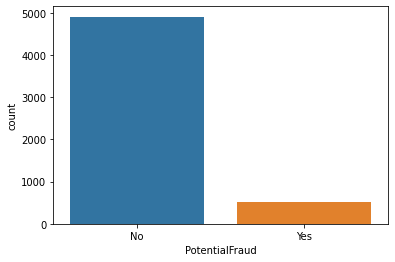

In [65]:
sns.countplot('PotentialFraud',data=train)

Note -: Above bar graph repersent the data is imbalanced

Percentage of fraudulent encounters Inpatient / Outpatient.

In [66]:
only_fraud_provider = train.loc[train['PotentialFraud']=='Yes']
print("Dataset shape : ", only_fraud_provider.shape)
only_fraud_provider.head(5)

Dataset shape :  (506, 2)


,Provider,PotentialFraud
1,PRV51003,Yes
3,PRV51005,Yes
13,PRV51021,Yes
25,PRV51037,Yes
37,PRV51052,Yes


In [67]:
fraud_provider_inpatient_df = pd.merge(train_inpat, only_fraud_provider, how='inner', on='Provider')
print("Dataset shape : ", fraud_provider_inpatient_df.shape)
fraud_provider_inpatient_df.head(5)

Dataset shape :  (23402, 33)


,level_0,index,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,1882,1882,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,...,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes
2,2964,2964,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,...,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,Yes
3,3311,3311,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,...,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Yes
4,3729,3729,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,...,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,Yes


In [69]:
print("Dataset shape : ", fraud_provider_inpatient_df.shape)
print("Percentage of fraud cases related to inpatinet data : ",(fraud_provider_inpatient_df.shape[0]/train_inpat.shape[0])*100)

Dataset shape :  (23402, 33)
Percentage of fraud cases related to inpatinet data :  57.81983495577408


Dataset shape :  (23402, 31)

Percentage of fraud cases related to inpatinet data :  57.81983495577408



1. Around 58 % of the outpatient data for training has fradulent encounter



In [70]:
fraud_provider_outpatient_df = pd.merge(train_outpat, only_fraud_provider, how='inner', on='Provider')
print("Dataset shape : ", fraud_provider_outpatient_df.shape)
fraud_provider_outpatient_df.head(5)

Dataset shape :  (189394, 28)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes


In [71]:
print("Dataset shape : ", fraud_provider_outpatient_df.shape)
print("Percentage of fraud cases related to outpatinet data : ",(fraud_provider_outpatient_df.shape[0]/train_outpat.shape[0])*100)

Dataset shape :  (189394, 28)
Percentage of fraud cases related to outpatinet data :  36.58112130290089


Around 37 % of the outpatient data for training has fradulent encounter

Most used procedure codes and diagnosis codes used by the potential fradulent providers



1. Inpatient - Procedure



(17325, 1)


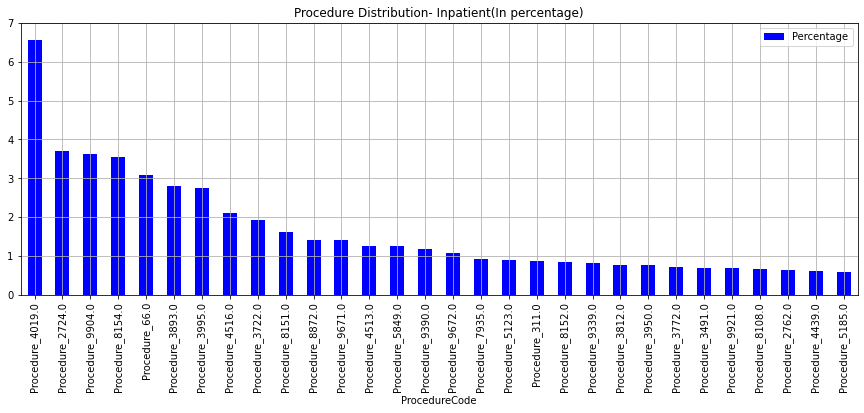

In [72]:
#create a dataframe for concatinating all Procedure Code columns  
train_inpat_df = pd.DataFrame(columns = ['ProcedureCode'])
train_inpat_df['ProcedureCode'] = pd.concat([fraud_provider_inpatient_df["ClmProcedureCode_1"], 
                                           fraud_provider_inpatient_df["ClmProcedureCode_2"],
                                           fraud_provider_inpatient_df["ClmProcedureCode_3"],
                                           fraud_provider_inpatient_df["ClmProcedureCode_4"], 
                                           fraud_provider_inpatient_df["ClmProcedureCode_5"], 
                                           fraud_provider_inpatient_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()
print(train_inpat_df.shape)
analyse_cat_columns(train_inpat_df, col_to_analyse='ProcedureCode' , prefix = 'Procedure_',title = 'Procedure Distribution- Inpatient(In percentage)',top_val = 30)

Inpatient - Diagnosis

(40474, 32)


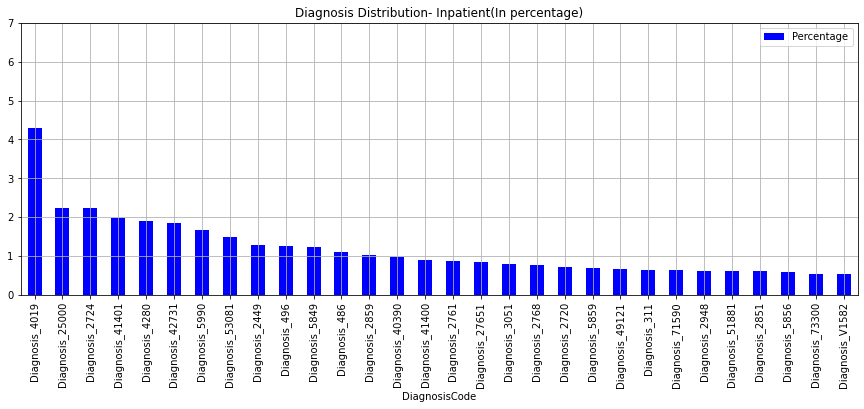

In [73]:
#create a dataframe for concatinating all DiagnosisCode Code columns  
train_inpat_df = pd.DataFrame(columns = ['DiagnosisCode'])
train_inpat_df['DiagnosisCode'] = pd.concat([fraud_provider_inpatient_df["ClmDiagnosisCode_1"], 
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_2"], 
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_3"], 
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_4"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_5"], 
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_6"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_7"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_8"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_9"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

print(train_inpat.shape)
analyse_cat_columns(train_inpat_df,col_to_analyse='DiagnosisCode' , prefix = 'Diagnosis_',title = 'Diagnosis Distribution- Inpatient(In percentage)',top_val=30)

Outpatient - Procedure

(96, 1)


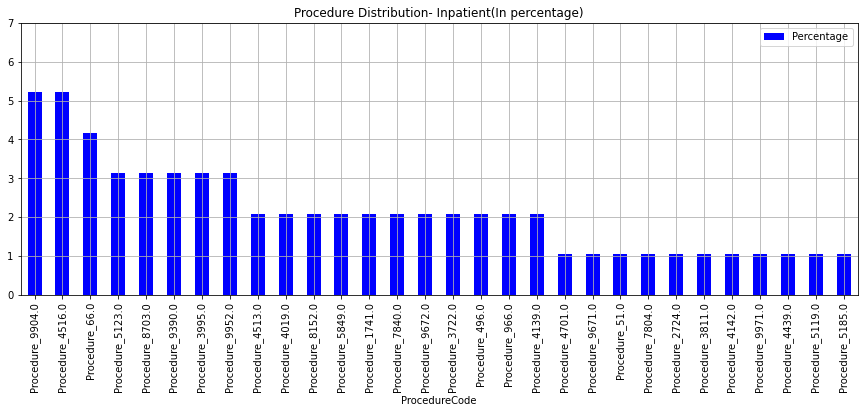

In [74]:
#create a dataframe for concatinating all Procedure Code columns  
train_outpat_df = pd.DataFrame(columns = ['ProcedureCode'])
train_outpat_df['ProcedureCode'] = pd.concat([fraud_provider_outpatient_df["ClmProcedureCode_1"], 
                                           fraud_provider_outpatient_df["ClmProcedureCode_2"],
                                           fraud_provider_outpatient_df["ClmProcedureCode_3"],
                                           fraud_provider_outpatient_df["ClmProcedureCode_4"], 
                                           fraud_provider_inpatient_df["ClmProcedureCode_5"], 
                                           fraud_provider_outpatient_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

print(train_outpat_df.shape)
analyse_cat_columns(train_outpat_df, col_to_analyse='ProcedureCode' , prefix = 'Procedure_',title = 'Procedure Distribution- Inpatient(In percentage)',top_val=30)

Outpatient - Diagnosis

(494869, 1)


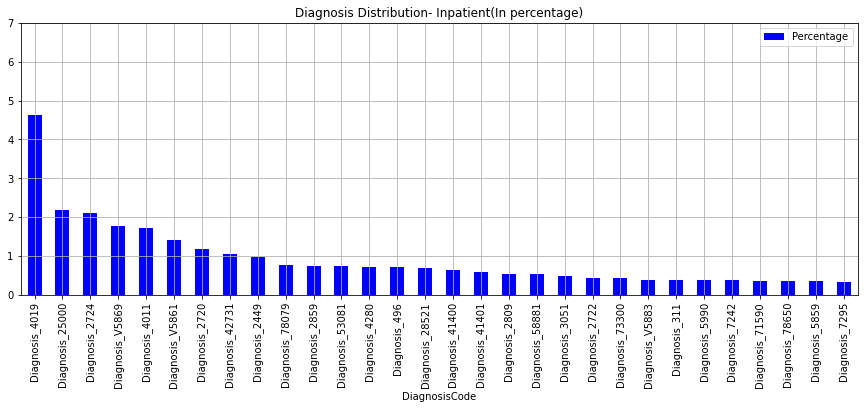

In [75]:
#create a dataframe for concatinating all DiagnosisCode Code columns  
train_outpat_df = pd.DataFrame(columns = ['DiagnosisCode'])
train_outpat_df['DiagnosisCode'] = pd.concat([fraud_provider_outpatient_df["ClmDiagnosisCode_1"], 
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_2"], 
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_3"], 
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_4"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_5"], 
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_6"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_7"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_8"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_9"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

print(train_outpat_df.shape)
analyse_cat_columns(train_outpat_df, col_to_analyse='DiagnosisCode' , prefix = 'Diagnosis_',title = 'Diagnosis Distribution- Inpatient(In percentage)',top_val=30)

Gaining Insights from beneficiary Data



1.  This data contains beneficiary KYC details like health conditions,regioregion they belong to etc.

In [76]:
#check all the columns of the beneficiary dataset and top 5 data points
print('Columns in this dataset are : ')
print(train_benef.columns)

train_benef.head(2)

Columns in this dataset are : 
Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


State and County

Inpatient + fraud -- State

In [77]:
train_benef_df = pd.merge(train_benef, fraud_provider_inpatient_df, how='inner', on='BeneID')
print(train_benef_df.shape)
train_benef_df.head(2)

(23402, 57)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE11017,1940-06-01,NaN,2,1,0,31,270,12,12,...,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN,Yes


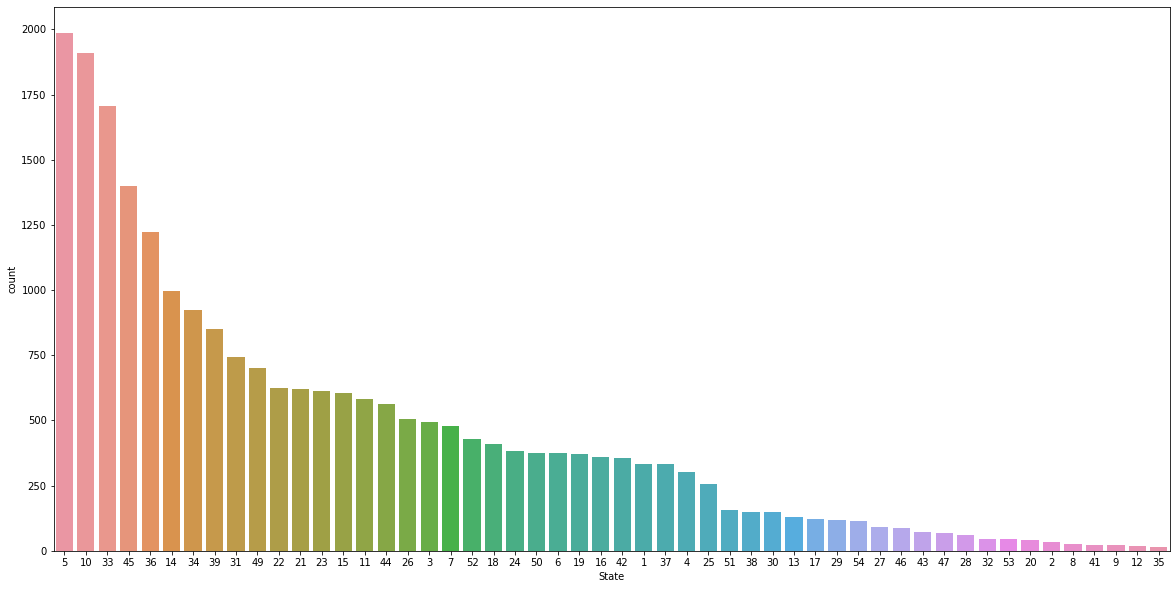

In [78]:
#tr_data_final.State
plt.figure(figsize=(20, 10))
sns.countplot(x='State',y=None, data = train_benef_df, orient ="v", order = train_benef_df['State'].value_counts().index)

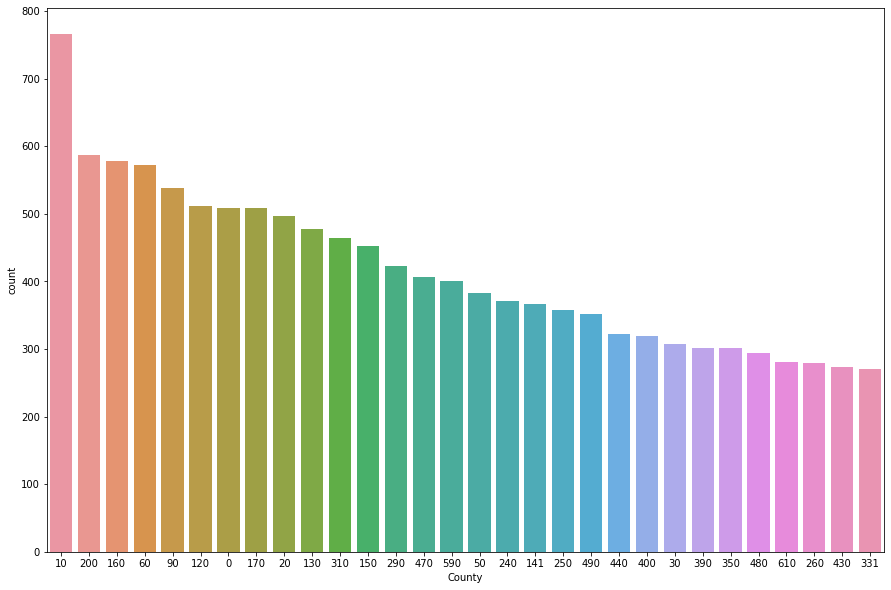

In [80]:
#tr_data_final.State
plt.figure(figsize=(15, 10))
sns.countplot(x='County',y=None, data=train_benef_df, orient ="v", order = train_benef_df['County'].value_counts().head(30).index)

Inpatient + fraud -- State

State coded as 5,10,33 and 45 have most fradulent encounters for Inpatient data.

County coded as 10,200,160 and 60 have most fradulent encounters for Inpatient data.

#Outpatient +Fraud -- State

In [81]:
tr_bene_outpat_df = pd.merge(train_benef, fraud_provider_outpatient_df, how='inner', on='BeneID')
print(tr_bene_outpat_df.shape)
tr_bene_outpat_df.head(2)

(189394, 52)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes


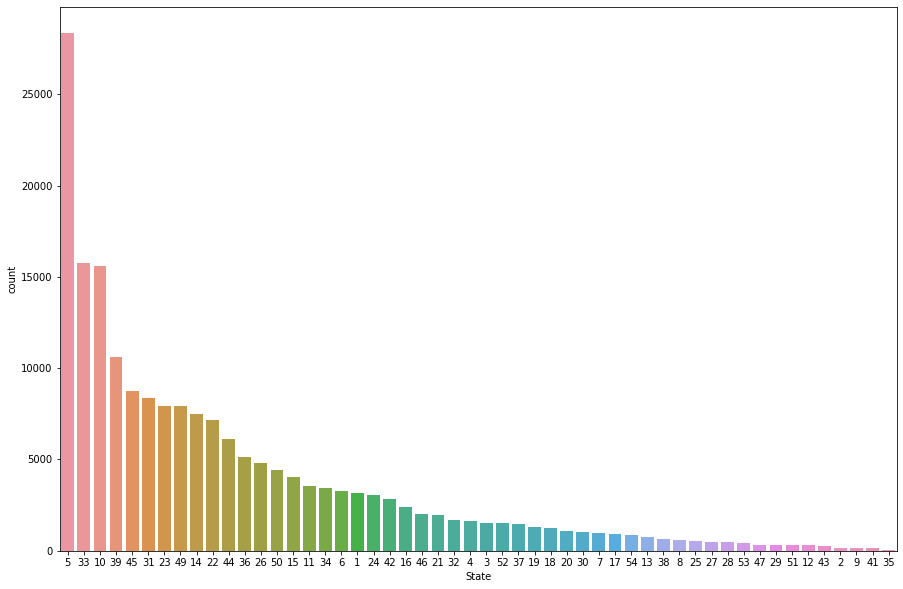

In [83]:
#tr_data_final.State
plt.figure(figsize=(15, 10))
sns.countplot(x='State',y=None, data=tr_bene_outpat_df, orient ="v", order = tr_bene_outpat_df['State'].value_counts().index)

Outpatient + fraud -- State

State coded as 5,33,10 and 39 have most fradulent encounters for Inpatient data.

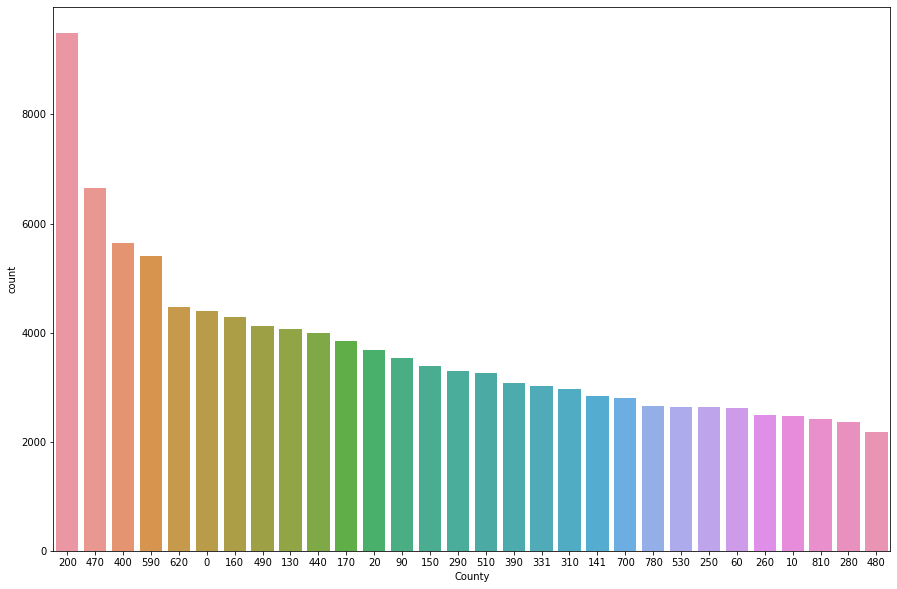

In [84]:
#tr_data_final.State
plt.figure(figsize=(15, 10))
sns.countplot(x='County',y=None, data=tr_bene_outpat_df, orient ="v", order = tr_bene_outpat_df['County'].value_counts().head(30).index)

Outpatient + fraud -- State

County coded as 200, 470, 400 and 590 have most fradulent encounters for Outpatient data .

#DOB

Inpatient + Fraud - DOB

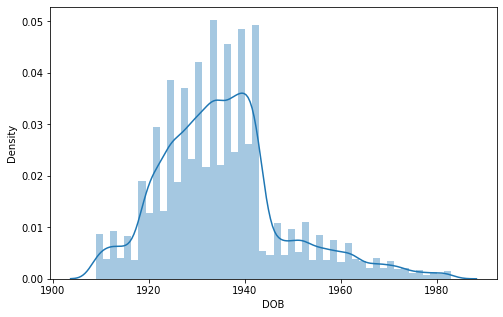

In [85]:
plt.figure(figsize=(8, 5))
sns.distplot(train_benef_df.DOB.apply(get_year))

Inpatient + Fraud - DOB

Most Fradulent ecounters in Inpatatinet Data is observed for the patients born between 1920 and 1945

#Outpatient + Fraud - DOB

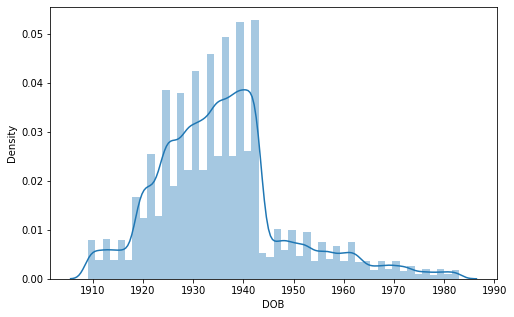

In [86]:
plt.figure(figsize=(8, 5))
sns.distplot(tr_bene_outpat_df.DOB.apply(get_year))

Outpatient + Fraud - DOB

Most Fradulent ecounters in Inpatatinet Data is observed for the patients born between 1920 and 1945.

Calculating Money lost in Fraud for both Inpatient and outpatinet data.

In [87]:
#merging Inpatint and labeled fradulent providers
inpat_labeled_provider_df = pd.merge(train_inpat, train, how='inner', on='Provider')
print(inpat_labeled_provider_df.shape)

(40474, 33)


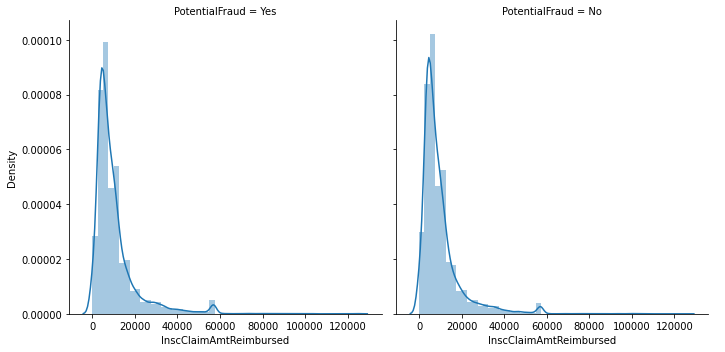

<Figure size 432x288 with 0 Axes>

In [88]:
sns.FacetGrid(inpat_labeled_provider_df, col='PotentialFraud',height=5).map(sns.distplot, "InscClaimAmtReimbursed",).add_legend()
plt.show()
plt.tight_layout()

In [89]:
#calculatinng total money lost ib fradulent encounters
Total_money_lost = inpat_labeled_provider_df.loc[inpat_labeled_provider_df['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()
print("Total money lost : ", Total_money_lost)

Total money lost :  241288510


In [90]:
#merging Outpatint and labeled fradulent providers
outpat_labeled_provider_df = pd.merge(train_outpat, train, how='inner', on='Provider')
print(outpat_labeled_provider_df.shape)

(517737, 28)


In [91]:
#calculatinng total money lost ib fradulent encounters
Total_money_lost = outpat_labeled_provider_df.loc[outpat_labeled_provider_df['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()
print("Total money lost : ", Total_money_lost)

Total money lost :  54392610


In [92]:
print('Total monney lost as per the data for 2019 = ','241288510+54392610, That is around 290 Million' )

Total monney lost as per the data for 2019 =  241288510+54392610, That is around 290 Million


Upto this point we have done thorough EDA on columns of each of the data files. NOw we will merge them all and then perform EDA to establish a trend in data and the target

Data preprocessing and Feature Engineering



1.Merging all datasets together



In [93]:
train_inpat['is_admitted'] = 1
train_outpat['is_admitted'] = 0

In [105]:
# Merge in_pt, out_pt and ben df into a single patient dataset
tr_data1 = pd.merge(train_inpat, train_outpat,
                    left_on = [ idx for idx in train_outpat.columns if idx in train_inpat.columns],
                    right_on = [ idx for idx in train_outpat.columns if idx in train_inpat.columns],
                    how = 'outer').\
          merge(train_benef, left_on='BeneID',right_on='BeneID',how='inner')

In [106]:
# Replace values with a binary annotation
tr_data1 = tr_data1.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                   'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                   'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                   'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2, 'Gender': 2 }, 
                  0)

In [107]:
#tr_data1.RenalDiseaseIndicator.unique() #array(['0', 'Y'], dtype=object)
# Replace values with a binary annotation
tr_data1 = tr_data1.replace({'RenalDiseaseIndicator': 'Y'}, 1).astype({'RenalDiseaseIndicator': 'int64'})

In [108]:
#merging the dataset created in above step with target_data
tr_data_final = pd.merge(tr_data1, train, how = 'outer', on = 'Provider' )

In [109]:
# adding extra column target, having binary annotation
tr_data_final['target'] = tr_data_final['PotentialFraud']

# 1 representing potential fraud and 0 representing non potential fraud
tr_data_final['target'] = tr_data_final['target'].map({"Yes":1,"No":0})
tr_data_final['target'] = tr_data_final['target'].astype('category', copy=False)

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64


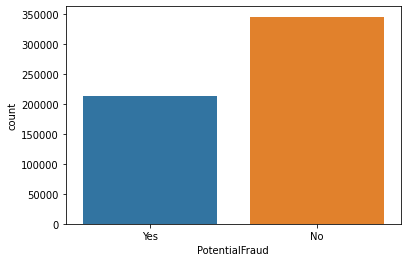

In [110]:
print(tr_data_final.PotentialFraud.value_counts())
sns.countplot(x='PotentialFraud', data=tr_data_final)

In [111]:
print(tr_data_final.shape)
tr_data_final.head(5)

(558211, 59)


,level_0,index,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,target
0,0.0,0.0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,...,1,0,1,1,36000,3204,60,70,Yes,1
1,NaN,NaN,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,...,1,0,0,0,24000,2136,450,200,Yes,1
2,1882.0,1882.0,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,...,1,0,0,0,19000,1068,100,20,Yes,1
3,2964.0,2964.0,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,...,1,1,0,0,17000,1068,1050,540,Yes,1
4,3311.0,3311.0,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,...,1,1,1,0,27000,2136,450,160,Yes,1


In [112]:
tr_data_final.columns

Index(['level_0', 'index', 'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'is_admitted', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'C

In [115]:
tr_data_final.drop(['level_0', 'index'], axis=1, inplace=True)

In [116]:
tr_data_final.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'is_admitted', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depressio

In [117]:
#check colums for NaN values
tr_data_final.isna().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [118]:
#Adding a column is_dead  = 1  DOD is given else is_dead = 0 
tr_data_final.loc[tr_data_final['DOD'].isnull(), 'Is_Dead'] = '0'
tr_data_final.loc[(tr_data_final['DOD'].notnull()), 'Is_Dead'] = '1'

As we have DOD for only few BeneID,so we can only determine the eaxct age of the patinets who has died. we cannot get the age of the patonets who might be alive. So its better that we calculate the age of the patient when we submiited his claim as we have record for ClaimStartDt.

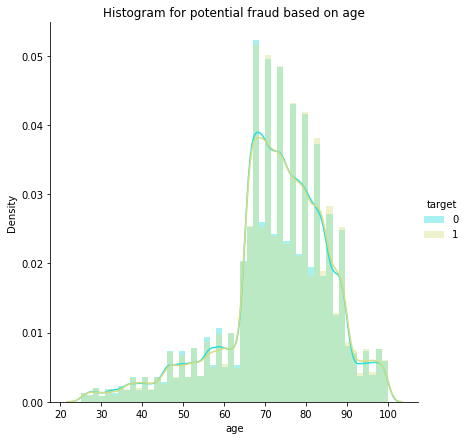

<Figure size 432x288 with 0 Axes>

In [120]:
tr_data_final['DOB'] =  pd.to_datetime(tr_data_final['DOB'], format='%Y-%m-%d')  
tr_data_final['ClaimStartDt'] = pd.to_datetime(tr_data_final['ClaimStartDt'], format='%Y-%m-%d')  

#now = pd.to_datetime('2020-09-01' , format = '%Y-%m-%d')
tr_data_final['DOB'] = tr_data_final['DOB'].where(tr_data_final['DOB'] < tr_data_final['ClaimStartDt']) 
tr_data_final['age'] = (tr_data_final['ClaimStartDt'] - tr_data_final['DOB']).astype('<m8[Y]')

#plotting age
sns.FacetGrid(tr_data_final, hue="target" , size=6, palette='rainbow').map(sns.distplot, "age",).add_legend()
plt.title('Histogram for potential fraud based on age')
plt.show()
plt.tight_layout()

Age

We dont see any differnce in distribution of age that may enable us to flag potential fraud.

But we see increasing trend in the potential fraud cases for patients age > 65 Also most of the patient who applied for claim fall in this age range only

Text(0.5, 1.0, 'Plot to Analyse relation between Race and fraud/not fraud')

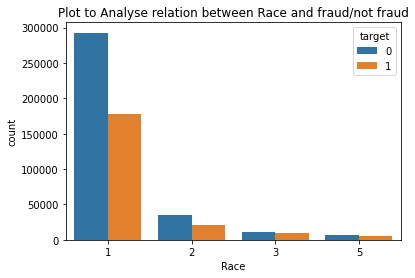

In [121]:
ax = sns.countplot(x='Race',data=tr_data_final,hue='target')
ax.set_title("Plot to Analyse relation between Race and fraud/not fraud")

Note -: It is very important to see that most fradulent cases is with patients belonging to a perticular Race and that is labelled as 1

In [122]:
tr_data_final = tr_data_final.drop(['DOD'], axis = 1)
tr_data_final = tr_data_final.drop(['DOB'], axis = 1)

In [123]:
#calculating number of days a patinet was admitted in the hospital and then removing admit and discharge date
#outpatients dont get admitted so we keep 0 for them
tr_data_final['AdmissionDt'] = pd.to_datetime(tr_data_final['AdmissionDt'] , format = '%Y-%m-%d')
tr_data_final['DischargeDt'] = pd.to_datetime(tr_data_final['DischargeDt'],format = '%Y-%m-%d')
tr_data_final['Num_admit_days'] = ((tr_data_final['DischargeDt'] - tr_data_final['AdmissionDt']).dt.days)+1
tr_data_final.loc[tr_data_final['is_admitted'] == 0, 'Num_admit_days'] = '0'

tr_data_final = tr_data_final.drop(['DischargeDt'], axis = 1)
tr_data_final = tr_data_final.drop(['AdmissionDt'], axis = 1)

In [124]:
#repalcing NaN value with 0
tr_data_final.loc[tr_data_final['DeductibleAmtPaid'].isnull(),'DeductibleAmtPaid'] = 0

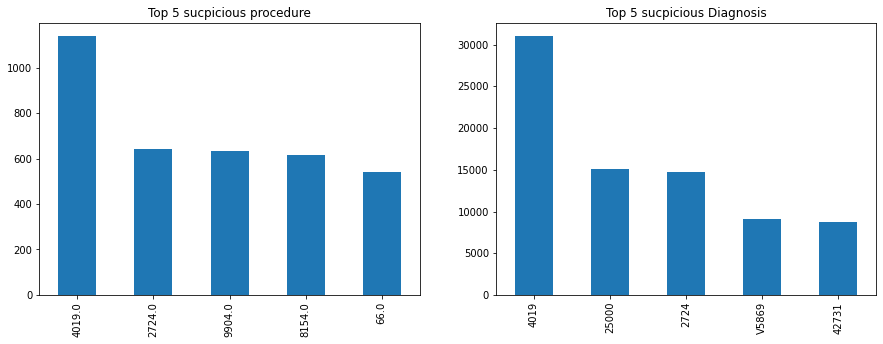

In [125]:
potential_fraud_df =tr_data_final.loc[tr_data_final['PotentialFraud'] == 'Yes']
df1 = pd.DataFrame(columns = ['ProcedureCode'])
df1['ProcedureCode'] = pd.concat([potential_fraud_df["ClmProcedureCode_1"], 
                                           potential_fraud_df["ClmProcedureCode_2"],
                                           potential_fraud_df["ClmProcedureCode_3"],
                                           potential_fraud_df["ClmProcedureCode_4"], 
                                           potential_fraud_df["ClmProcedureCode_5"], 
                                           potential_fraud_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

df2 = pd.DataFrame(columns = ['DiagnosisCode'])
df2['DiagnosisCode'] = pd.concat([potential_fraud_df["ClmDiagnosisCode_1"], 
                                           potential_fraud_df["ClmDiagnosisCode_2"], 
                                           potential_fraud_df["ClmDiagnosisCode_3"], 
                                           potential_fraud_df["ClmDiagnosisCode_4"],
                                           potential_fraud_df["ClmDiagnosisCode_5"], 
                                           potential_fraud_df["ClmDiagnosisCode_6"],
                                           potential_fraud_df["ClmDiagnosisCode_7"],
                                           potential_fraud_df["ClmDiagnosisCode_8"],
                                           potential_fraud_df["ClmDiagnosisCode_9"],
                                           potential_fraud_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

plt.figure(figsize=(15, 5))
plt.subplot(121)
df1.ProcedureCode.value_counts().head(5).plot(kind = 'bar' , title ='Top 5 sucpicious procedure')
plt.subplot(122)
df2.DiagnosisCode.value_counts().head(5).plot(kind = 'bar' , title ='Top 5 sucpicious Diagnosis')

In [126]:
Diag_proce_col = ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10',
                  'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                  'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                  'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1',
                  'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                  'ClmProcedureCode_5', 'ClmProcedureCode_6']

tr_data_final[Diag_proce_col]= tr_data_final[Diag_proce_col].replace({np.nan:0})
tr_data_final.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,target,Is_Dead,age,Num_admit_days
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,...,1,36000,3204,60,70,Yes,1,0,66.0,7.0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,0,...,0,24000,2136,450,200,Yes,1,0,77.0,0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,...,0,19000,1068,100,20,Yes,1,0,95.0,13.0
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,V5789,...,0,17000,1068,1050,540,Yes,1,0,87.0,19.0
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,...,0,27000,2136,450,160,Yes,1,0,79.0,5.0


In [127]:
def encoded_cat(dataset, feature_to_encode='',col_list=[]):
    """This function returns top 5 cat column useful in determining potential fraud"""
    outer_list =[]
    for col in col_list:
        list_1 = list()
        
        for item in list(dataset[col]):
            if str(item) == str(feature_to_encode):
                list_1.append(1)
            else:
                list_1.append(0)
        
        outer_list.append(list_1)
    
    li_sum = np.array([0]*558211)
    
    for i in range(0,len(outer_list)):
        li1 = np.array(outer_list[i])
        li_sum = li_sum + li1
        
    return li_sum
procedure_col = ['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']
   
diagnosis_col = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']

#top 5 procedure
# 4019.0, 2724.0, 9904.0, 8154.0, 66.0
tr_data_final['pr_4019'] = encoded_cat(tr_data_final,'4019.0',procedure_col)
tr_data_final['pr_2724'] = encoded_cat(tr_data_final,'2724.0',procedure_col)
tr_data_final['pr_9904'] = encoded_cat(tr_data_final,'9904.0',procedure_col)
tr_data_final['pr_8154'] = encoded_cat(tr_data_final,'8154.0',procedure_col)
tr_data_final['pr_66'] =   encoded_cat(tr_data_final,'66.0',procedure_col)

#top 5 diagnosis 
#4019, 25000, 2724, V5869,42731
tr_data_final['di_4019'] = encoded_cat(tr_data_final,'4019',diagnosis_col)
tr_data_final['di_25000'] = encoded_cat(tr_data_final,'25000',diagnosis_col)
tr_data_final['di_2724'] = encoded_cat(tr_data_final,'2724',diagnosis_col)
tr_data_final['di_V5869'] = encoded_cat(tr_data_final,'V5869',diagnosis_col)
tr_data_final['di_42731'] =   encoded_cat(tr_data_final,'42731',diagnosis_col)

In [128]:
for i in Diag_proce_col:
    tr_data_final[i][tr_data_final[i]!=0]= 1

tr_data_final[Diag_proce_col].head(5)

,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,1,1,0,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0,1,1,1,1,1,1,1,1,1.0,1.0,0.0,0.0,0.0,0.0
3,1,1,0,1,1,1,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,1,1,1,1,1,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [129]:
tr_data_final[Diag_proce_col]= tr_data_final[Diag_proce_col].astype(float)

In [130]:
#adding column total_num_diag
tr_data_final['total_num_diag'] = 0 
for col in diagnosis_col :
    tr_data_final['total_num_diag']  = tr_data_final['total_num_diag'] + tr_data_final[col]

In [131]:
#adding column total_num_proce
tr_data_final['total_num_proce'] = 0 
for col in procedure_col :
    tr_data_final['total_num_proce']  = tr_data_final['total_num_proce'] + tr_data_final[col]

In [132]:
tr_data_final['total_num_diag'] =  tr_data_final['total_num_diag'].astype(float)
tr_data_final['total_num_proce'] =  tr_data_final['total_num_proce'].astype(float)

Checking if we have duplicate rows

In [133]:
#Checking we how many distinct BeneID we have in our data
#len(list(tr_data_final.BeneID.value_counts()==1))
len(list(tr_data_final['BeneID'].unique()))

138556

In [134]:
#Checking we how many distinct BeneID we have in our data
len(list(tr_data_final['ClaimID'].unique()))

558211

We have data for 138556 BeneID.Means one beneficiarty has applied for claim mulriple times.

Also we have 558211 distinct claimsID,means we have seperate record for each benefiacry every time he appliedd for claims.

No duplicate rows are present in our dataset

In [135]:
val_counts_ = tr_data_final['BeneID'].value_counts()
tr_data_final_beneid_df = val_counts_.to_frame() #store this information in dataframe

tr_data_final_beneid_df.columns = ['count'] 
tr_data_final_beneid_df['BeneID'] = tr_data_final_beneid_df.index
tr_data_final_beneid_df

,count,BeneID
BENE42721,29,BENE42721
BENE59303,29,BENE59303
BENE118316,29,BENE118316
BENE80977,28,BENE80977
BENE36330,28,BENE36330
...,...,...
BENE71134,1,BENE71134
BENE118154,1,BENE118154
BENE100290,1,BENE100290
BENE137665,1,BENE137665


In [136]:
total_amt_list = []
mean_amt_list = []

for benid in tqdm(tr_data_final_beneid_df['BeneID']):
    
    total_amt = tr_data_final.loc[tr_data_final['BeneID'] == benid,'InscClaimAmtReimbursed'].sum() 
    mean_amt = total_amt / (tr_data_final_beneid_df.loc[tr_data_final_beneid_df['BeneID'] == benid,'count'])
    
    total_amt_list.append(total_amt)
    mean_amt_list.append(mean_amt)

100%|██████████| 138556/138556 [3:11:15<00:00, 12.07it/s]


In [137]:
mean_list = []
for item in tqdm(mean_amt_list):
    mean_list.append(item[0])

100%|██████████| 138556/138556 [00:02<00:00, 55615.82it/s]


In [138]:
tr_data_final_beneid_df['mean_InscClaimAmtReimbursed']=mean_list
tr_data_final_beneid_df['total_InscClaimAmtReimbursed']= total_amt_list
tr_data_final_beneid_df

,count,BeneID,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed
BENE42721,29,BENE42721,1217.586207,35310
BENE59303,29,BENE59303,1175.862069,34100
BENE118316,29,BENE118316,1481.034483,42950
BENE80977,28,BENE80977,2242.142857,62780
BENE36330,28,BENE36330,2181.785714,61090
...,...,...,...,...
BENE71134,1,BENE71134,10.000000,10
BENE118154,1,BENE118154,8000.000000,8000
BENE100290,1,BENE100290,19000.000000,19000
BENE137665,1,BENE137665,50.000000,50


In [139]:
tr_data_final_beneid_df.to_csv('tr_data_final_beneid_df.csv',index= False)

In [140]:
import pickle

with open('total_amt_list.pkl', 'wb') as f:
    pickle.dump(total_amt_list, f)
    
with open('mean_amt_list.pkl', 'wb') as f:
    pickle.dump(mean_amt_list, f)

In [141]:
tr_data_final = pd.merge(tr_data_final, tr_data_final_beneid_df, how='outer', on='BeneID')
print("Dataset shape : ", tr_data_final.shape)
tr_data_final.head(5)

Dataset shape :  (558211, 71)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,di_4019,di_25000,di_2724,di_V5869,di_42731,total_num_diag,total_num_proce,count,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,1.0,...,1,0,1,0,0,9.0,0.0,3,12000.0,36000
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,1.0,...,0,0,0,0,0,3.0,1.0,3,12000.0,36000
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,1.0,...,0,0,0,0,0,6.0,0.0,3,12000.0,36000
3,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,0.0,...,0,0,0,0,0,9.0,0.0,3,3150.0,9450
4,BENE16973,CLM65335,2009-08-25,2009-08-30,PRV55905,9000,PHY340413,PHY340413,NaN,1.0,...,0,0,0,0,0,3.0,1.0,3,3150.0,9450


In [142]:
tr_data_final[['mean_InscClaimAmtReimbursed','total_InscClaimAmtReimbursed']]= tr_data_final[['mean_InscClaimAmtReimbursed','total_InscClaimAmtReimbursed']]

In [143]:
def N_unique_values(df):
    """This function finds the unique values in a df row"""
    return np.array([len(set([i for i in x[~pd.isnull(x)]])) for x in df.values])

In [144]:
#number of unique physicians for each patient
tr_data_final['N_unique_Physicians'] = N_unique_values(tr_data_final[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']]) 

#encoding types of physicians into numeric values
tr_data_final[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = np.where(tr_data_final[['AttendingPhysician','OperatingPhysician',
                                                                                      'OtherPhysician']].isnull(), 0, 1)

# number of different physicians who attend a patient
tr_data_final['N_Types_Physicians'] = tr_data_final['AttendingPhysician'] +  tr_data_final['OperatingPhysician'] + tr_data_final['OtherPhysician']

# patients who was attended by only 1 physicians
tr_data_final['Same_Physician'] = tr_data_final.apply(lambda x: 1 if (x['N_unique_Physicians'] == 1 and x['N_Types_Physicians'] > 1) else 0,axis=1)

#determine if 1 physician has multi[le role to attend a patient
tr_data_final['Same_Physician2'] = tr_data_final.apply(lambda x: 1 if (x['N_unique_Physicians'] == 2 and x['N_Types_Physicians'] > 2) else 0,axis=1)

tr_data_final[['N_unique_Physicians','N_Types_Physicians','Same_Physician','Same_Physician2']].head()

,N_unique_Physicians,N_Types_Physicians,Same_Physician,Same_Physician2
0,1,1,0,0
1,1,2,1,0
2,2,2,0,0
3,2,2,0,0
4,1,2,1,0


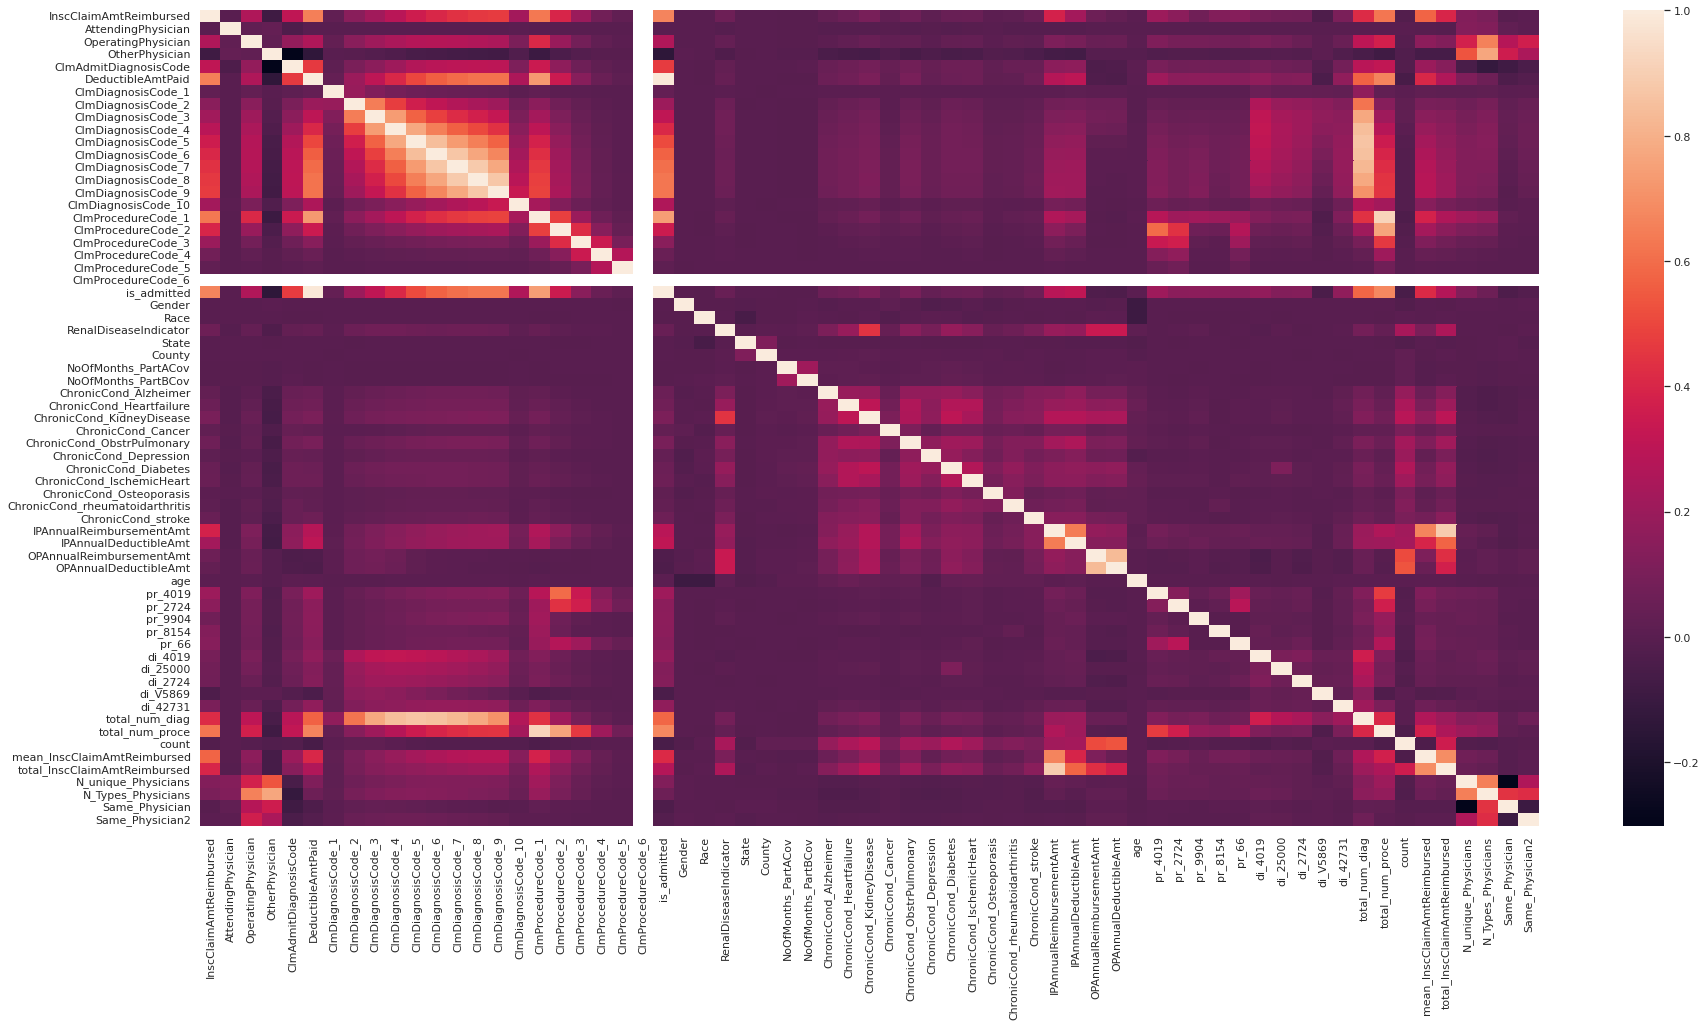

In [145]:
#plot correlation heat map between features
sns.set(context='notebook', style='whitegrid')
plt.figure(figsize=(30, 15))
corr = tr_data_final.corr()
sns.heatmap(corr, annot=False)

In [146]:
#repalve NaN val with 0
#tr_data_final.DiagnosisGroupCode
tr_data_final['DiagnosisGroupCode']= tr_data_final['DiagnosisGroupCode'].replace({np.nan:0})

In [147]:
#final check to see if a col val is NaN
col_inf_df=pd.DataFrame() 
val = tr_data_final.isnull().sum()
col_inf_df['null_col_count']  = val
col_inf_df['column'] = val.index
col_inf_df.loc[col_inf_df['null_col_count'] !=0]

,null_col_count,column


In [148]:
col_inf_df.null_col_count.value_counts()

0    75
Name: null_col_count, dtype: int64

In [149]:
for col in tr_data_final.columns:
    print(col)

BeneID
ClaimID
ClaimStartDt
ClaimEndDt
Provider
InscClaimAmtReimbursed
AttendingPhysician
OperatingPhysician
OtherPhysician
ClmAdmitDiagnosisCode
DeductibleAmtPaid
DiagnosisGroupCode
ClmDiagnosisCode_1
ClmDiagnosisCode_2
ClmDiagnosisCode_3
ClmDiagnosisCode_4
ClmDiagnosisCode_5
ClmDiagnosisCode_6
ClmDiagnosisCode_7
ClmDiagnosisCode_8
ClmDiagnosisCode_9
ClmDiagnosisCode_10
ClmProcedureCode_1
ClmProcedureCode_2
ClmProcedureCode_3
ClmProcedureCode_4
ClmProcedureCode_5
ClmProcedureCode_6
is_admitted
Gender
Race
RenalDiseaseIndicator
State
County
NoOfMonths_PartACov
NoOfMonths_PartBCov
ChronicCond_Alzheimer
ChronicCond_Heartfailure
ChronicCond_KidneyDisease
ChronicCond_Cancer
ChronicCond_ObstrPulmonary
ChronicCond_Depression
ChronicCond_Diabetes
ChronicCond_IschemicHeart
ChronicCond_Osteoporasis
ChronicCond_rheumatoidarthritis
ChronicCond_stroke
IPAnnualReimbursementAmt
IPAnnualDeductibleAmt
OPAnnualReimbursementAmt
OPAnnualDeductibleAmt
PotentialFraud
target
Is_Dead
age
Num_admit_days
pr_40

In [150]:
#saving dataframe to csv file to avoid rework
tr_data_final.to_csv("tr_data_final.csv",index= False)

In [151]:
tr_data_final = pd.read_csv("/content/tr_data_final.csv")

print(tr_data_final.shape)
tr_data_final.head(2)

(558211, 75)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,di_42731,total_num_diag,total_num_proce,count,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed,N_unique_Physicians,N_Types_Physicians,Same_Physician,Same_Physician2
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,1,0,0,1.0,...,0,9.0,0.0,3,12000.0,36000,1,1,0,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,1,1,0,1.0,...,0,3.0,1.0,3,12000.0,36000,1,2,1,0


In [152]:
col_to_remove = ['Provider','BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',\
                 'OperatingPhysician', 'OtherPhysician','ClmAdmitDiagnosisCode','NoOfMonths_PartACov',\
                 'NoOfMonths_PartBCov','DiagnosisGroupCode','PotentialFraud']

tr_data_final.drop(columns=col_to_remove, axis=1, inplace=True)
tr_data_final['target']=tr_data_final['target'].astype(int)

In [153]:
tr_data_final.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,...,di_42731,total_num_diag,total_num_proce,count,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed,N_unique_Physicians,N_Types_Physicians,Same_Physician,Same_Physician2
0,26000,1068.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,9.0,0.0,3,12000.0,36000,1,1,0,0
1,5000,1068.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3.0,1.0,3,12000.0,36000,1,2,1,0
2,5000,1068.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,6.0,0.0,3,12000.0,36000,2,2,0,0
3,50,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,9.0,0.0,3,3150.0,9450,2,2,0,0
4,9000,1068.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3.0,1.0,3,3150.0,9450,1,2,1,0


In [154]:
tr_data_final['target'].value_counts()

0    345415
1    212796
Name: target, dtype: int64

Dvide the data set

In [155]:
y = tr_data_final['target']
X = tr_data_final.drop('target', axis=1)

In [156]:
X.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'is_admitted', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Is_Dead', 'ag

split the data set

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)


print("Shapes data into train,test,CV splitting..")
print("Training X : ",X_train.shape," | Training Y : ",y_train.shape)
print("Test X : ",X_test.shape," | Test Y : ",y_test.shape)

Shapes data into train,test,CV splitting..
Training X :  (374001, 61)  | Training Y :  (374001,)
Test X :  (184210, 61)  | Test Y :  (184210,)


Handling Numerical Column

In [164]:
from sklearn.preprocessing import Normalizer , StandardScaler

def num_col_normalizer(X_tr,X_te,col=''):
    """This function retruns normalised column for train and test data"""
    normalizer = Normalizer()
    
    normalizer.fit(X_tr[col].values.reshape(1,-1))
    
    tr = normalizer.fit_transform(X_tr[col].values.reshape(1,-1)).reshape(-1,1)
    te = normalizer.fit_transform(X_te[col].values.reshape(1,-1)).reshape(-1,1)
    
    return tr,te

#InscClaimAmtReimbursed
tr,te = num_col_normalizer(X_train, X_test,col='InscClaimAmtReimbursed')
X_train['InscClaimAmtReimbursed'] = tr
X_test ['InscClaimAmtReimbursed'] = te

tr,te = num_col_normalizer(X_train, X_test,col='DeductibleAmtPaid')
X_train['DeductibleAmtPaid'] = tr
X_test ['DeductibleAmtPaid'] = te

tr,te = num_col_normalizer(X_train, X_test,col='IPAnnualReimbursementAmt')
X_train['IPAnnualReimbursementAmt'] = tr
X_test ['IPAnnualReimbursementAmt'] = te

tr,te = num_col_normalizer(X_train, X_test,col='IPAnnualDeductibleAmt')
X_train['IPAnnualDeductibleAmt'] = tr
X_test ['IPAnnualDeductibleAmt'] = te

tr,te = num_col_normalizer(X_train, X_test,col='OPAnnualReimbursementAmt')
X_train['OPAnnualReimbursementAmt'] = tr
X_test ['OPAnnualReimbursementAmt'] = te

tr,te = num_col_normalizer(X_train, X_test,col='OPAnnualDeductibleAmt')
X_train['OPAnnualDeductibleAmt'] = tr
X_test ['OPAnnualDeductibleAmt'] = te

tr,te = num_col_normalizer(X_train, X_test,col='mean_InscClaimAmtReimbursed')
X_train['mean_InscClaimAmtReimbursed'] = tr
X_test ['mean_InscClaimAmtReimbursed'] = te

tr,te = num_col_normalizer(X_train, X_test,col='total_InscClaimAmtReimbursed')
X_train['total_InscClaimAmtReimbursed'] = tr
X_test ['total_InscClaimAmtReimbursed'] = te


tr,te = num_col_normalizer(X_train, X_test,col='age')
X_train['age'] = tr
X_test ['age'] = te
        
tr,te = num_col_normalizer(X_train, X_test,col='Num_admit_days')
X_train['Num_admit_days'] = tr
X_test ['Num_admit_days'] = te

tr,te = num_col_normalizer(X_train, X_test,col='N_unique_Physicians')
X_train['N_unique_Physicians'] = tr
X_test ['N_unique_Physicians'] = te


tr,te = num_col_normalizer(X_train, X_test,col='N_Types_Physicians')
X_train['N_Types_Physicians'] = tr
X_test ['N_Types_Physicians'] = te

In [165]:
X_train.head(5)

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,...,di_42731,total_num_diag,total_num_proce,count,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed,N_unique_Physicians,N_Types_Physicians,Same_Physician,Same_Physician2
291034,0.000165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,0.0,5,0.000107,0.000098,0.002355,0.001939,0,0
469483,0.000165,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3.0,0.0,5,0.000162,0.000147,0.001178,0.000970,0,0
58448,0.000033,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,0.0,6,0.000371,0.000406,0.001178,0.001939,1,0
403368,0.000012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,0.0,3,0.000045,0.000025,0.002355,0.001939,0,0
138503,0.000124,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,9.0,2.0,17,0.000171,0.000528,0.002355,0.001939,0,0


In [166]:
X_test.head(5)

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,...,di_42731,total_num_diag,total_num_proce,count,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed,N_unique_Physicians,N_Types_Physicians,Same_Physician,Same_Physician2
146519,0.000179,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3.0,0.0,2,0.000241,0.000089,0.001679,0.001382,0,0
11321,0.000006,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,6.0,0.0,7,0.000134,0.000172,0.001679,0.001382,0,0
46577,0.000537,0.001639,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2.0,0.0,9,0.000170,0.000282,0.001679,0.001382,0,0
85539,0.000358,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3.0,0.0,7,0.000465,0.000599,0.001679,0.002763,1,0
170928,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3.0,0.0,3,0.000061,0.000034,0.001679,0.001382,0,0


In [178]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [179]:
def get_threshould_fpr_tpr(y, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
    return fpr, tpr, thresholds

def draw_Roc_Auc_plot(train_fpr, train_tpr,test_fpr, test_tpr):
    plt.plot(train_fpr, train_tpr, label="train AUC = "+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC = "+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

#determining best threshold
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

#pridicting Yq for given Xq with best threshold:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def get_confusion_matrix(y, y_pred,axis, best_t):
    cm = pd.DataFrame(confusion_matrix(y, predict_with_best_t(y_pred, best_t)))
    sns.heatmap(cm, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'],ax=axis)

In [180]:
def model_performence_check(model,X_train,X_test,y_train,y_test):
    
    y_train_pred = model.predict_proba(X_train)[:,1]    
    y_test_pred = model.predict_proba(X_test)[:,1]
    
    train_fpr, train_tpr, tr_thresholds = get_threshould_fpr_tpr(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = get_threshould_fpr_tpr(y_test, y_test_pred)
    
    #plot Roc_AUC_curve
    draw_Roc_Auc_plot(train_fpr, train_tpr,test_fpr, test_tpr)
    
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    #draw confusion matrix
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3)) 

    #training confusion matrix heatmap
    get_confusion_matrix(y_train, y_train_pred,ax[0], best_t)
    ax[0].set_title("confusion matrix for traning data")

    #test confusion matrix heatmap
    get_confusion_matrix(y_test, y_test_pred,ax[1], best_t)
    ax[1].set_title("confusion matrix for test data")
    
    actual_output = y_test
    pred_output = predict_with_best_t(y_test_pred, best_t)
    
    model_f1_score = metrics.f1_score(actual_output,pred_output)
    print("Model test F1 score is : ",model_f1_score)
    
    model_AUC_score = metrics.auc(test_fpr, test_tpr)
    print("Model test AUC score is : ",model_AUC_score)
    
    return (model_f1_score, model_AUC_score)

Xg_Boost

In [167]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

XGB = xgb.XGBClassifier()

parameters = {"eta" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] , "n_estimators" : [5,10,50, 75, 100]}

XGB_CV = RandomizedSearchCV(XGB, parameters , cv=5, scoring='roc_auc', n_jobs=-1,return_train_score=True, verbose=10)
XGB_CV.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",XGB_CV.best_params_)
print("roc_auc :",XGB_CV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
tuned hpyerparameters :(best parameters)  {'n_estimators': 100, 'eta': 0.001}
roc_auc : 0.7190433773007674


In [169]:
XGB2 = xgb.XGBClassifier(n_estimators=100, eta=0.001)

XGB2=XGB2.fit(X_train,y_train)

print("score",XGB2.score(X_test,y_test))

score 0.684664241897834


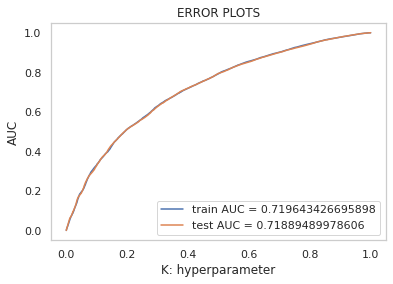

the maximum value of tpr*(1-fpr) 0.4431718252427695 for threshold 0.379
Model test F1 score is :  0.5972942920681985
Model test AUC score is :  0.71889489978606


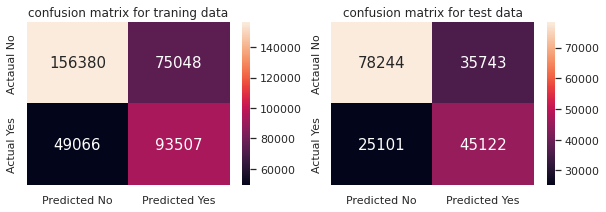

In [181]:
model_f1_score, model_AUC_score = model_performence_check(XGB2, X_train, X_test, y_train,y_test)